### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

### Reading the csv and preprocessing the data for plots

In [2]:
#reading the csv
df = pd.read_csv('tradewar.csv', encoding='utf8', engine='python')
#filling the nan values with blanks where the information couldn't fetch
df = df.fillna(' ')
#converting some features into numeric
df['favorite_count'] = pd.to_numeric(df['favorite_count'])
df['retweet_count'] = pd.to_numeric(df['retweet_count'])
#converting the creation date into date time to extract hours and days
df['created_at'] = pd.to_datetime(df['created_at'])
df['hour'] = df['created_at'].map(lambda x:x.hour)
df['day'] = df['created_at'].map(lambda x:x.day)

In [3]:
#total number of records
print('Total number of tweets: ',len(df))

Total number of tweets:  10319


Data was collected by using Tweepy (task 1 notebook) by my personal Twitter API and fetched from 13th of May 2019 till 17th of May till the time the code ran

*The data was collected on 17th of May so the data was not fetched for the whole day of 17th, so for plotting the 17th day is removed

On 13th of May there was the highest number of tweets posted using that hashtags

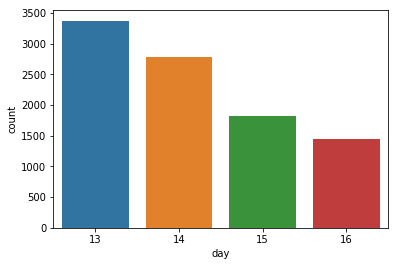

In [4]:
ax = sns.countplot(x="day", data=df[df.day != 17])

13th hour followed by 14th and 15th hour were the busiest time of these tweets in all these 4 days

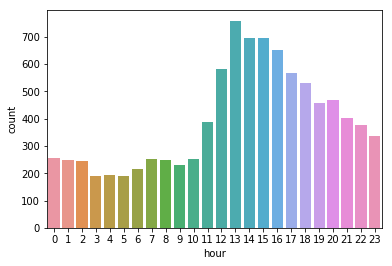

In [5]:
ax = sns.countplot(x="hour", data=df[df.day != 17])

Boxplot shows that 50% of the tweets were of length between 40 and 80.
The clean text version of the tweet is been used here

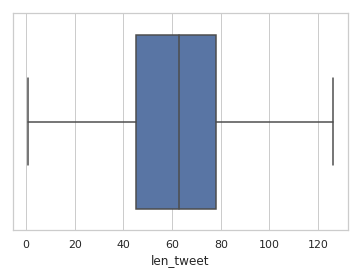

In [6]:
df['len_tweet'] = df['clean_text'].str.len()
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['len_tweet'])

Table of top 10 favorite tweets (have most likes) alongwith the count of likes and retweets, the original author, polarity (neutral, negative or positive), subjectivity, hour of the day and the day and its place 

In [7]:
df[['original_text','favorite_count','retweet_count','original_author','polarity','subjectivity','hour','day','place']].sort_values(by='favorite_count',ascending=False).head(10)

,original_text,favorite_count,retweet_count,original_author,polarity,subjectivity,hour,day,place
8620,NEVER FORGET - CHINA OWNS a massive amount of ...,3533,1016,SRuhle,0.000000,1.000000,16,13,New York City
8520,China will definitely introduce further counte...,3480,215,globaltimesnews,0.100000,0.350000,16,13,"Bejing, China"
5575,The full-on #tradewar with #China is going to ...,2058,979,GordonGChang,0.000000,0.000000,13,14,
4469,.@senatemajldr McConnell Disagrees With @realD...,960,589,SaraCarterDC,0.000000,0.000000,20,14,"Washington, D.C."
5495,Trump falsely claimed that he could “equalize”...,843,407,DrDenaGrayson,-0.400000,0.600000,13,14,Florida
8254,"The party of fiscal responsibility, folks! \n\...",615,355,BWestbrookAZ8,0.000000,0.000000,17,13,"⚧🌹Phoenix, Arizona🌹⚧"
5566,Branco Cartoon: No more kowtow https://t.co/lQ...,445,254,afbranco,0.000000,0.000000,13,14,Washington State
3290,Trump has no clue how to negotiate trade with ...,427,152,Rob_Rogers,0.200000,0.200000,13,15,"Pittsburgh, PA"
9252,CHART OF THE DAY: After #China retaliates on U...,415,434,JavierBlas,0.000000,0.300000,13,13,London
4608,"Yes, the #tradewar with #China could last a lo...",321,109,GordonGChang,0.041071,0.277381,19,14,


Table of top 10 retweeted tweets (have most retweets) alongwith the count of likes and retweets, the original author, polarity (neutral, negative or positive), subjectivity, hour of the day and the day and its place 

In [8]:
df[['original_text','favorite_count','retweet_count','original_author','polarity','subjectivity','hour','day','place']].sort_values(by='retweet_count',ascending=False).head(10)

,original_text,favorite_count,retweet_count,original_author,polarity,subjectivity,hour,day,place
8620,NEVER FORGET - CHINA OWNS a massive amount of ...,3533,1016,SRuhle,0.000000,1.000000,16,13,New York City
5575,The full-on #tradewar with #China is going to ...,2058,979,GordonGChang,0.000000,0.000000,13,14,
4469,.@senatemajldr McConnell Disagrees With @realD...,960,589,SaraCarterDC,0.000000,0.000000,20,14,"Washington, D.C."
9252,CHART OF THE DAY: After #China retaliates on U...,415,434,JavierBlas,0.000000,0.300000,13,13,London
5495,Trump falsely claimed that he could “equalize”...,843,407,DrDenaGrayson,-0.400000,0.600000,13,14,Florida
8254,"The party of fiscal responsibility, folks! \n\...",615,355,BWestbrookAZ8,0.000000,0.000000,17,13,"⚧🌹Phoenix, Arizona🌹⚧"
5566,Branco Cartoon: No more kowtow https://t.co/lQ...,445,254,afbranco,0.000000,0.000000,13,14,Washington State
8520,China will definitely introduce further counte...,3480,215,globaltimesnews,0.100000,0.350000,16,13,"Bejing, China"
4338,We are in a MUCH more superior position and Ch...,240,210,proxcee,0.162500,0.762500,22,14,"Atlanta, GA via NJ"
8552,"Thanks to Senator #TomCotton, the #GOP has a n...",261,160,ShelbyKStewart,0.012121,0.351515,16,13,Venus


Calculating top 10 hashtags used

In [9]:
# Hashtags
tag_dict = {}

for values in df.hashtags.str.split(', ', expand=False).dropna():
    for ht in values:
        ht = ht.lower()
        # Hashtags - tokenize and build dict of tag counts
        if (len(ht) > 1):
            if ht in tag_dict:
                tag_dict[ht] += 1
            else:
                tag_dict[ht] = 1

# The 10 most popular tags and counts
print('Top 10 hashtags:')
print('----------------')
for tag in sorted(tag_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]:
    print(tag[0], '-', str(tag[1]))


Top 10 hashtags:
----------------
tradewar - 2885
tariffs - 2352
china - 2030
trump - 1090
tradewars - 718
tradedeal - 640
us - 488
trade - 342
stockmarket - 329
usa - 224


Calculating top 10 user mentions

In [10]:
#Mentions
mention_dict = {}

for values in df.user_mentions.str.split(', ', expand=False).dropna():
    for mention in values:
        mention = mention.lower()
        # Hashtags - tokenize and build dict of mention counts
        if (len(mention) > 1):
            if mention in mention_dict:
                mention_dict[mention] += 1
            else:
                mention_dict[mention] = 1

# The 10 most popular mentions and counts
print('Top 10 mentions:')
print('----------------')
for mention in sorted(mention_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]:
    print(mention[0], '-', str(mention[1]))

Top 10 mentions:
----------------
realdonaldtrump - 503
potus - 62
cnbc - 41
gop - 38
youtube - 22
scmpnews - 21
cnn - 18
business - 16
wsj - 16
walmart - 14


Calculating top 10 locations of the users who posted these tweets

In [11]:
# Location of the user who tweeted
place_dict = {}

for values in df.place.dropna():
    if (len(values) > 1):
        if values in place_dict:
            place_dict[values] += 1
        else:
            place_dict[values] = 1

# The 10 most popular places and counts
print('Top 10 places:')
print('----------------')
for places in sorted(place_dict.items(), key=lambda kv: kv[1], reverse=True)[:10]:
    print(places[0], '-', str(places[1]))

Top 10 places:
----------------
United States - 928
Washington, DC - 224
New York, NY - 142
India - 116
London, England - 114
Chicago, IL - 92
Hong Kong - 90
Global - 89
Singapore - 85
USA - 84


Making the list of hashtags used for searching the tweets (as they will be great in numbers) and filter them out to see what other hashtags were used more frequently in those tweets

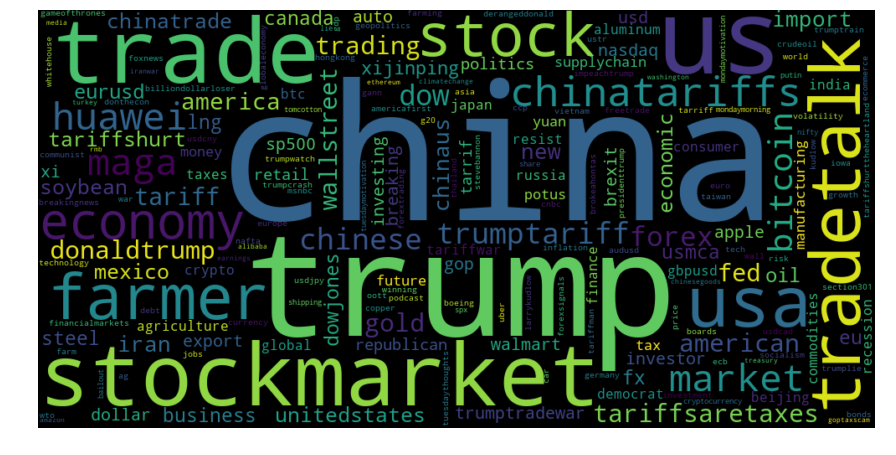

In [12]:
hashtags_list = ['uschinatrade', 'uschinatradewar', 'uschinatradewars', 'uschina', 'tradewar', 'tradewars', 'tradedeal', 'tariffs']
ht_list = []
for values in df.hashtags.str.split(', ', expand=False):
    for ht in values:
        if ht.lower() not in hashtags_list:
            ht_list.append(ht.lower())

wordcloud = wordcloud = WordCloud(width = 1000, height = 500, collocations=False).generate((" ").join(ht_list))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

It's interesting to see some of the most frequently hashtags used like farmer, maga, bitcoin etc 

Distribution of positive, neutral and negative tweets

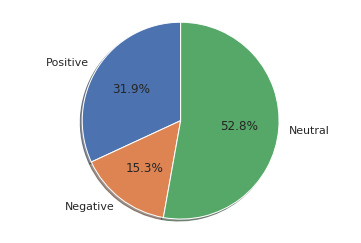

In [13]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [len(df[df.polarity>0]), len(df[df.polarity<0]), len(df[df.polarity==0])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

However, when the tweets are fully subjective (subjectivity=1), there are more negative tweets

In [14]:
df_full_subjective = df[df.subjectivity==1]
print('Positive tweets count when it is fully subjective: ',len(df_full_subjective[df_full_subjective.polarity>0.5]))
print('Negative tweets count when it is fully subjective: ',len(df_full_subjective[df_full_subjective.polarity<-0.5]))

Positive tweets count when it is fully subjective:  41
Negative tweets count when it is fully subjective:  90


List of top 5 retweeted tweets that are fully subjective alongwith their original author, polarity and the location of the user 

In [15]:
df_full_subjective[['original_text','favorite_count','retweet_count','original_author','polarity','place']].sort_values(by='retweet_count',ascending=False).head(5)

,original_text,favorite_count,retweet_count,original_author,polarity,place
8620,NEVER FORGET - CHINA OWNS a massive amount of ...,3533,1016,SRuhle,0.0,New York City
6121,Trump speaking about tariffs on Monday: “Our f...,31,22,ChrisLu44,0.8,
3302,‘I’ll never vote for him again!’ Angry farmers...,41,20,cowboytexas,-0.5,"St Petersburg, FL"
10103,GM\nChina-US trade tensions are getting a lot ...,24,13,elerianm,0.1,USA
5185,Curious how @TheDemocrats who oppose #Tariffs ...,30,12,dhiggins63,-0.1,USA


Having a look at words used in positive (polarity > 0.5) and negative (polarity < -0.5) subjective tweets (people own words rather than facts used)

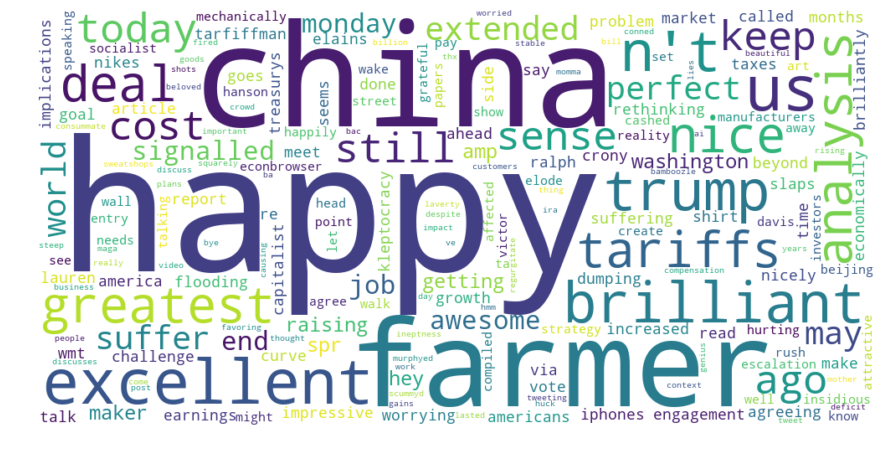

In [16]:
words_list = []
for values in df_full_subjective[df_full_subjective.polarity>0.5].clean_text.str.split(' ', expand=False):
    for value in values:
        words_list.append(value.lower())

wordcloud = wordcloud = WordCloud(background_color="white",width = 1000, height = 500, collocations=False).generate((" ").join(words_list))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

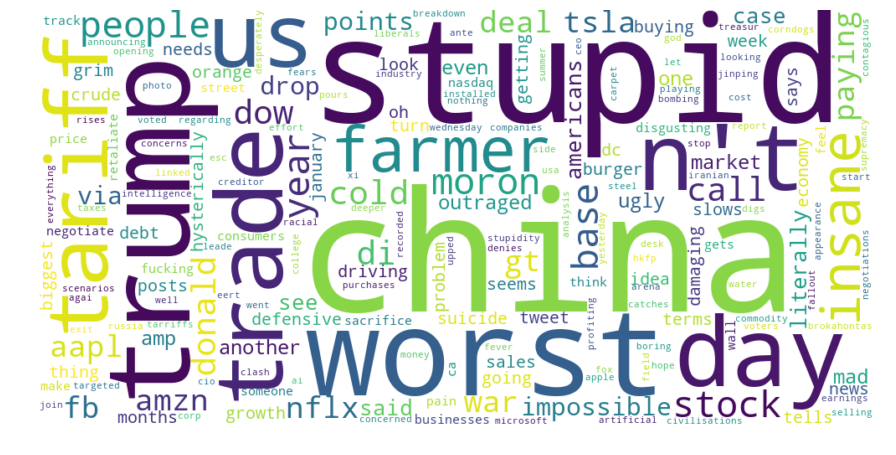

In [17]:
words_list = []
for values in df_full_subjective[df_full_subjective.polarity<-0.5].clean_text.str.split(' ', expand=False):
    for value in values:
        words_list.append(value.lower())

wordcloud = wordcloud = WordCloud(background_color="white",width = 1000, height = 500, collocations=False).generate((" ").join(words_list))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()